In [1]:
#Imports
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from scipy.stats import norm
from sklearn import preprocessing
from random import random
import math

import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline


In [2]:
df = pd.read_csv("/Users/normalazo/Desktop/env1/Entrega3_LR/regLin.csv")
#df = pd.read_csv("/Users/normalazo/Desktop/env1/Entrega3_LR/regLin2.csv")
#df = pd.read_csv("/Users/normalazo/Desktop/env1/Entrega3_LR/regLin3.csv")
#df = pd.read_csv("/Users/normalazo/Desktop/env1/Entrega3_LR/regLin4.csv")
#df = pd.read_csv("/Users/normalazo/Desktop/env1/Entrega3_LR/regLinPoli.csv")

In [3]:
# This data does not have headers so each attribute or field is simply enumerated
df.describe()


,X,y
count,1029.000000,1029.000000
mean,50.008111,32.893917
std,29.055066,18.083566
min,0.030369,-4.586608
25%,25.201087,17.583093
50%,50.884987,33.564129
75%,75.636823,48.339811
max,99.959580,71.762748


In [4]:
# Here df.columns is a list of all the columns and df.columns[0:-1] is all columns minus the last which is y. 
# If the data had headers you could use column names: df[['column1','column2','etc']]
X_train, X_test, Y_train, Y_test = train_test_split(df[df.columns[0:-1]],df[df.columns[-1]], train_size=0.75)


/Users/normalazo/Desktop/env1/pythonEnv1/lib/python2.7/site-packages/sklearn/model_selection/_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [5]:
# index for selecting data 0.75 is the percentage in training
index=np.array([1 if random() < 0.75 else 0 for i in range(len(df))])

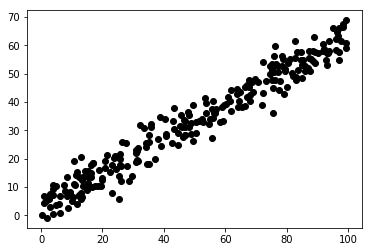

In [6]:
# Separate both train and test as well as the response variable
X_train=np.array(df[df.columns[0:-1]])[index==1]
X_test=np.array(df[df.columns[0:-1]])[index==0]
Y_train=np.array(df[df.columns[-1]])[index==1]
Y_test=np.array(df[df.columns[-1]])[index==0]

plt.scatter(X_test, Y_test,  color='black')

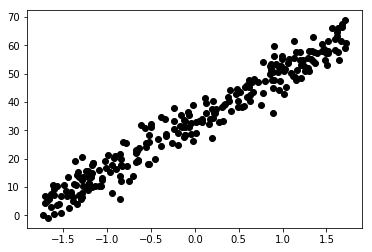

In [7]:
# Normalizar no ayuda mucho pero sale igual al de sklearn. Para que las alturas del pdf signifiquen lo mismo 
scaler = preprocessing.StandardScaler().fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

plt.scatter(X_test, Y_test,  color='black')

In [8]:
# Create linear regression object
regr = linear_model.LinearRegression()

In [9]:
# Train the model using the training sets
regr.fit(X_train, Y_train)

/Users/normalazo/Desktop/env1/pythonEnv1/lib/python2.7/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Coefficients:
[ 17.468305]
Mean squared error: 16.69
Variance score: 0.95


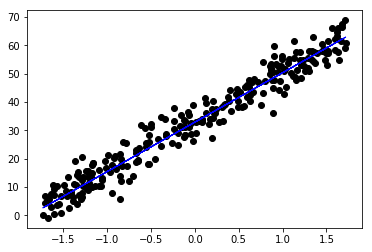

In [10]:
Y_pred = regr.predict(X_test)

# Make predictions using the testing set
# The coefficients
print"Coefficients:"

print regr.coef_
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(Y_test, Y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(Y_test, Y_pred))

# Plot outputs
plt.scatter(X_test, Y_test,  color='black')
plt.plot(X_test, Y_pred, color='blue', linewidth=1)

#plt.xticks(())
#plt.yticks(())

plt.show()

In [11]:
coef = regr.coef_
intercept = regr.intercept_
intercept
#coef[0]

32.849621976668814

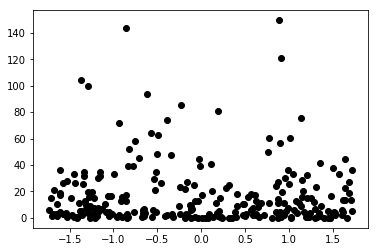

In [12]:
err = np.zeros(len(X_test))

for i in range (0,len(X_test)):
    err[i] = math.pow(Y_test[i] - (coef*X_test[i] + intercept),2)
    
plt.scatter(X_test, err,  color='black')

plt.show()


In [13]:
mediaS=np.mean(err, axis=0)
mediaS



16.686831232104559

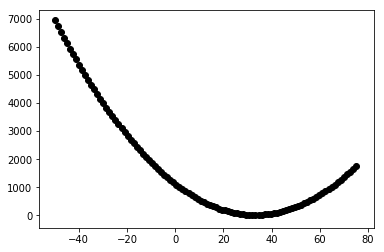

In [19]:
arr = np.zeros((100,2))

w = np.linspace(-50,75,100)

errN = np.zeros(len(X_test))
i=0.0
aux = 0

while(i<100.0):
    arr[aux][0] = w[aux]
    for j in range (0,len(X_test)):
        errN[j] = math.pow(Y_test[j] - (coef*X_test[j] + arr[aux][0]),2)
    arr[aux][1]=np.mean(errN, axis=0)
    i = i+1.0
    aux = aux + 1

for i in range(0,len(arr)):
    x_err = arr[i][0]
    y_err = arr[i][1]
    plt.scatter(x_err, y_err,  color='black')



plt.show()


    
    

